In [1]:
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [29]:

# https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

In [92]:
# Dataset loading

# Load the AG News dataset
dataset = load_dataset('ag_news')

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], 
                    padding='max_length', 
                    truncation=True, 
                    max_length=128)  # Reduced from 512 to 128

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Prepare the datasets for PyTorch
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

# Split the dataset
train_dataset = tokenized_datasets['train']
test_dataset = tokenized_datasets['test']

Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [3]:
# Create DataLoaders
batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [4]:
example = next(enumerate(train_loader))

In [5]:
example

(0,
 {'labels': tensor([3, 0, 2, 1, 0, 0, 0, 1, 2, 0, 3, 1, 0, 3, 3, 1, 0, 0, 2, 2, 0, 2, 1, 2,
          0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 3, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 3,
          2, 0, 0, 2, 1, 3, 3, 1, 0, 0, 1, 3, 0, 2, 2, 2, 1, 3, 3, 3, 2, 0, 3, 0,
          0, 1, 1, 0, 2, 2, 0, 3, 1, 1, 2, 3, 3, 2, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3,
          2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 3, 1, 0, 1, 3, 2, 2, 1,
          0, 1, 0, 3, 1, 2, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 2, 0, 2, 0, 1, 2, 3, 2,
          0, 2, 1, 2, 1, 2, 0, 2, 0, 3, 0, 2, 0, 3, 3, 1, 1, 2, 1, 0, 2, 1, 3, 3,
          2, 0, 0, 0, 1, 0, 3, 1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 0, 2, 3, 1, 2, 3, 0,
          2, 2, 3, 2, 1, 3, 2, 3, 0, 3, 3, 2, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 1, 2,
          0, 2, 3, 3, 2, 1, 0, 3, 1, 3, 1, 2, 2, 3, 0, 3, 3, 3, 0, 1, 1, 1, 3, 2,
          0, 0, 2, 0, 2, 3, 0, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 1, 1, 3, 3, 3, 0, 0,
          3, 0, 0, 0, 2, 1, 3, 0, 2, 0, 2, 0, 1, 0, 3, 3, 0, 2, 0, 3, 1, 3, 1, 1,
  

In [6]:
example[1]

{'labels': tensor([3, 0, 2, 1, 0, 0, 0, 1, 2, 0, 3, 1, 0, 3, 3, 1, 0, 0, 2, 2, 0, 2, 1, 2,
         0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 3, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 3,
         2, 0, 0, 2, 1, 3, 3, 1, 0, 0, 1, 3, 0, 2, 2, 2, 1, 3, 3, 3, 2, 0, 3, 0,
         0, 1, 1, 0, 2, 2, 0, 3, 1, 1, 2, 3, 3, 2, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3,
         2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 3, 1, 0, 1, 3, 2, 2, 1,
         0, 1, 0, 3, 1, 2, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 2, 0, 2, 0, 1, 2, 3, 2,
         0, 2, 1, 2, 1, 2, 0, 2, 0, 3, 0, 2, 0, 3, 3, 1, 1, 2, 1, 0, 2, 1, 3, 3,
         2, 0, 0, 0, 1, 0, 3, 1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 0, 2, 3, 1, 2, 3, 0,
         2, 2, 3, 2, 1, 3, 2, 3, 0, 3, 3, 2, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 1, 2,
         0, 2, 3, 3, 2, 1, 0, 3, 1, 3, 1, 2, 2, 3, 0, 3, 3, 3, 0, 1, 1, 1, 3, 2,
         0, 0, 2, 0, 2, 3, 0, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 1, 1, 3, 3, 3, 0, 0,
         3, 0, 0, 0, 2, 1, 3, 0, 2, 0, 2, 0, 1, 0, 3, 3, 0, 2, 0, 3, 1, 3, 1, 1,
         3, 0, 2, 

In [7]:
example[1]['labels']

tensor([3, 0, 2, 1, 0, 0, 0, 1, 2, 0, 3, 1, 0, 3, 3, 1, 0, 0, 2, 2, 0, 2, 1, 2,
        0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 3, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 3,
        2, 0, 0, 2, 1, 3, 3, 1, 0, 0, 1, 3, 0, 2, 2, 2, 1, 3, 3, 3, 2, 0, 3, 0,
        0, 1, 1, 0, 2, 2, 0, 3, 1, 1, 2, 3, 3, 2, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3,
        2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 3, 1, 0, 1, 3, 2, 2, 1,
        0, 1, 0, 3, 1, 2, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 2, 0, 2, 0, 1, 2, 3, 2,
        0, 2, 1, 2, 1, 2, 0, 2, 0, 3, 0, 2, 0, 3, 3, 1, 1, 2, 1, 0, 2, 1, 3, 3,
        2, 0, 0, 0, 1, 0, 3, 1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 0, 2, 3, 1, 2, 3, 0,
        2, 2, 3, 2, 1, 3, 2, 3, 0, 3, 3, 2, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 1, 2,
        0, 2, 3, 3, 2, 1, 0, 3, 1, 3, 1, 2, 2, 3, 0, 3, 3, 3, 0, 1, 1, 1, 3, 2,
        0, 0, 2, 0, 2, 3, 0, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 1, 1, 3, 3, 3, 0, 0,
        3, 0, 0, 0, 2, 1, 3, 0, 2, 0, 2, 0, 1, 0, 3, 3, 0, 2, 0, 3, 1, 3, 1, 1,
        3, 0, 2, 3, 0, 2, 0, 0, 3, 0, 1,

In [8]:
example[1]['input_ids']

tensor([[  101, 10424,  9541,  ...,     0,     0,     0],
        [  101,  7823,  7327,  ...,     0,     0,     0],
        [  101,  3081,  9006,  ...,     0,     0,     0],
        ...,
        [  101,  2796,  2457,  ...,     0,     0,     0],
        [  101,  6529,  2817,  ...,     0,     0,     0],
        [  101,  1057,  1012,  ...,     0,     0,     0]])

In [9]:
example[1]['input_ids'].shape

torch.Size([512, 512])

In [10]:
example[1]['input_ids'][0,:]

tensor([  101, 10424,  9541,  9354,  8480,  1999,  1996,  2866,  1996,  2326,
         4473,  5198,  2000,  3945,  2005,  3563,  5167,  2000,  2424,  1996,
         2190,  3066,  1998,  1010,  4406,  2070,  2714,  2329,  4573,  1010,
         2009,  1001,  4464,  1025,  1055,  2489,  2000,  5198,  1998, 16629,
         1012,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [94]:
# Start with a Vanilla RNN
class VanillaRNN(nn.Module):
    def __init__(self,vocab_size, input_size, hidden_size, output_size):
        super(VanillaRNN, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.hidden_size = hidden_size
        
        self.W_ih = nn.Parameter(torch.Tensor(input_size, hidden_size)) #Weights Input to hidden
        self.W_hh = nn.Parameter(torch.Tensor(hidden_size, hidden_size)) #Weights Hidden to hidden
        self.b_ih = nn.Parameter(torch.Tensor(hidden_size)) #Bias input to Hidden
        self.b_hh = nn.Parameter(torch.Tensor(hidden_size)) #Bias hidden to hidden
        
        # Define a simple linear layer for the output.
        self.fc = nn.Linear(hidden_size, output_size)
        
        self.reset_parameters()
        
    def reset_parameters(self):
        stdv = 1.0 / (self.hidden_size ** 0.5)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)
            
    def forward(self, x, hidden=None):
        """
        x: Tensor of shape (batch_size, seq_len) (token indices)
        hidden: Tensor of shape (batch_size, hidden_size)
        """
        batch_size, seq_len = x.size()  # Expect only 2D input (batch, seq_len)

        if hidden is None:
            hidden = torch.zeros(batch_size, self.hidden_size, device=x.device)

        # Embed the token indices into a 3D tensor (batch_size, seq_len, embed_size)**
        x = self.embedding(x)

        # Process sequence one timestep at a time
        for t in range(seq_len):
            x_t = x[:, t, :]  # Shape: (batch_size, embed_size)
            hidden = torch.tanh(x_t @ self.W_ih + self.b_ih + hidden @ self.W_hh + self.b_hh)

        out = self.fc(hidden)
        return out, hidden

Using device: cuda
Running epoch: 0
Running batch: 0
Running batch: 1
Running batch: 2
Running batch: 3
Running batch: 4
Running batch: 5
Running batch: 6
Running batch: 7
Running batch: 8
Running batch: 9
Epoch 1/3, Train Loss: 0.0593, Test Loss: 1.3869
Running epoch: 1
Running batch: 0
Running batch: 1
Running batch: 2
Running batch: 3
Running batch: 4
Running batch: 5
Running batch: 6
Running batch: 7
Running batch: 8
Running batch: 9
Epoch 2/3, Train Loss: 0.0592, Test Loss: 1.3867
Running epoch: 2
Running batch: 0
Running batch: 1
Running batch: 2
Running batch: 3
Running batch: 4
Running batch: 5
Running batch: 6
Running batch: 7
Running batch: 8
Running batch: 9
Epoch 3/3, Train Loss: 0.0592, Test Loss: 1.3878


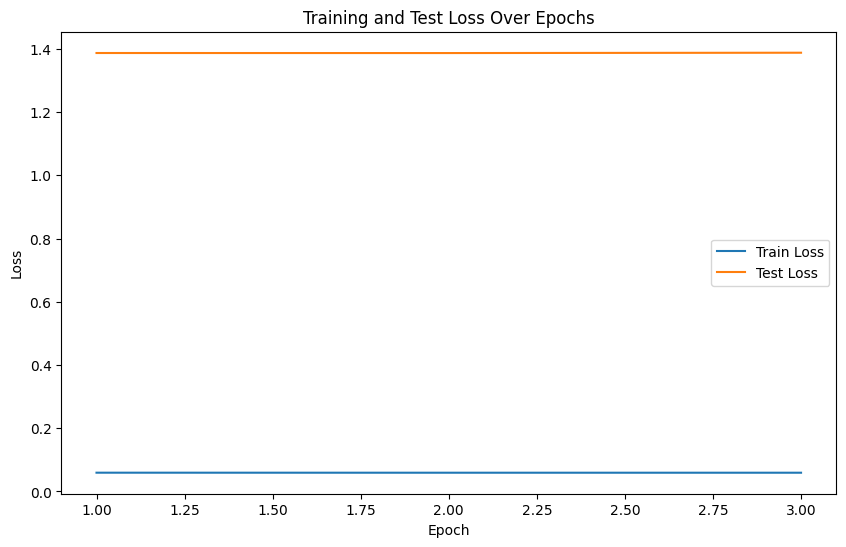

In [97]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

vocab_size = tokenizer.vocab_size  # Get vocab size from BERT tokenizer
embed_size = 128  # Choose a reasonable embedding dimension
hidden_size = 32 # Hidden state size
output_size = 4 # There are 4 labels for it
num_epochs = 3
# Initialize the model, loss, and optimizer
model = VanillaRNN(vocab_size, embed_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    print("Running epoch:", epoch)
    model.train()
    running_loss = 0.0
    batch_counter = 0  # Add a batch counter to assess speed
    for batch in train_loader:
        print("Running batch:", batch_counter)
        batch_counter = batch_counter + 1
        input_ids = batch['input_ids'].to(device)  # Shape: (batch_size, seq_len)
        labels = batch['labels'].to(device)        # Shape: (batch_size,)
        
        optimizer.zero_grad()
        outputs, _ = model(input_ids)  # Convert to float for matrix multiplication
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * input_ids.size(0)
        # Break out of training for brevity in the class, you can remove this
        if batch_counter == 10:
            break
    
    epoch_train_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)
    
    # Evaluate on test set
    model.eval()
    running_loss_test = 0.0
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            outputs, _ = model(input_ids)
            loss = criterion(outputs, labels)
            running_loss_test += loss.item() * input_ids.size(0)
    
    epoch_test_loss = running_loss_test / len(test_dataset)
    test_losses.append(epoch_test_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

# Plot the training and test losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

In [119]:
import torch
import torch.nn as nn

class MultiLayerRNN(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, num_layers=2, dropout=0.5):
        super(MultiLayerRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # **Embedding layer for tokenized text**
        self.embedding = nn.Embedding(vocab_size, embed_size)

        # **RNN Layers**
        self.rnn_layers = nn.ModuleList()
        for i in range(num_layers):
            input_dim = embed_size if i == 0 else hidden_size  # First layer uses embedding, others use hidden_size
            self.rnn_layers.append(nn.Linear(input_dim + hidden_size, hidden_size))  # Vanilla RNN logic

        # **Layer normalization**
        self.layer_norms = nn.ModuleList([nn.LayerNorm(hidden_size) for _ in range(num_layers)])

        # **Dropout**
        self.dropout = nn.Dropout(dropout)

        # **Final classification layer**
        self.fc = nn.Linear(hidden_size, output_size)

        self.reset_parameters()

    def reset_parameters(self):
        """Initializes weights uniformly."""
        stdv = 1.0 / (self.hidden_size ** 0.5)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def forward(self, x, hidden=None):
        """
        x: Tensor of shape (batch_size, seq_len) (tokenized text input)
        hidden: Tensor of shape (num_layers, batch_size, hidden_size)
        """
        batch_size, seq_len = x.size()  # Expect (batch_size, seq_len)
        x = self.embedding(x)  # Convert token indices to word embeddings → (batch_size, seq_len, embed_size)

        # Initialize hidden states if not provided
        if hidden is None:
            hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size, device=x.device)

        # Process the sequence one time step at a time
        for t in range(seq_len):
            x_t = x[:, t, :]  # Extract timestep (batch_size, embed_size)
            
            for i, rnn_layer in enumerate(self.rnn_layers):
                hidden_prev = hidden[i]  # Previous hidden state for this layer
                combined = torch.cat((x_t, hidden_prev), dim=-1)  # Merge input and previous hidden
                hidden[i] = torch.tanh(rnn_layer(combined))  # Apply transformation

                # Apply layer normalization & dropout
                hidden[i] = self.layer_norms[i](hidden[i].clone())
                hidden[i] = self.dropout(hidden[i])

                x_t = hidden[i]  # Feed forward to next layer

        # Final output using last hidden state of last layer
        out = self.fc(hidden[-1])
        return out, hidden



Using device: cuda
Running epoch: 0
Running batch: 0
Running batch: 1
Running batch: 2
Running batch: 3
Running batch: 4
Running batch: 5
Running batch: 6
Running batch: 7
Running batch: 8
Running batch: 9
Epoch 1/3, Train Loss: 0.0592, Test Loss: 1.3869
Running epoch: 1
Running batch: 0
Running batch: 1
Running batch: 2
Running batch: 3
Running batch: 4
Running batch: 5
Running batch: 6
Running batch: 7
Running batch: 8
Running batch: 9
Epoch 2/3, Train Loss: 0.0592, Test Loss: 1.3879
Running epoch: 2
Running batch: 0
Running batch: 1
Running batch: 2
Running batch: 3
Running batch: 4
Running batch: 5
Running batch: 6
Running batch: 7
Running batch: 8
Running batch: 9
Epoch 3/3, Train Loss: 0.0592, Test Loss: 1.3865


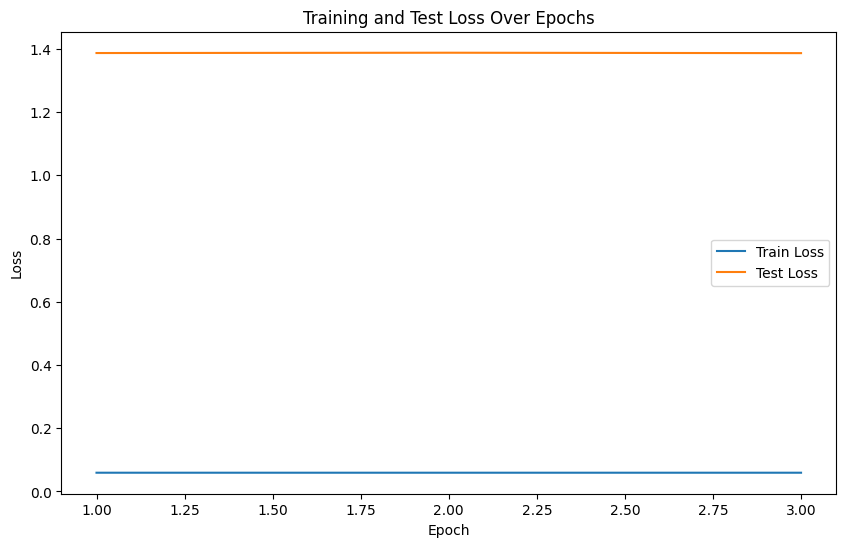

In [120]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

vocab_size = tokenizer.vocab_size  # Vocabulary size from BERT tokenizer
embed_size = 128   # Embedding size
hidden_size = 256  # RNN hidden state size
output_size = 4    # Number of classes (AG News has 4 categories)
num_layers = 3     # Multi-layer RNN
dropout = 0.3

# Instantiate the model
model = MultiLayerRNN(vocab_size, embed_size, hidden_size, output_size, num_layers, dropout).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    print("Running epoch:", epoch)
    model.train()
    running_loss = 0.0
    batch_counter = 0  # Add a batch counter to assess speed
    for batch in train_loader:
        print("Running batch:", batch_counter)
        batch_counter = batch_counter + 1
        input_ids = batch['input_ids'].to(device)  # Shape: (batch_size, seq_len)
        labels = batch['labels'].to(device)        # Shape: (batch_size,)
        
        optimizer.zero_grad()
        outputs, hidden = model(input_ids)  # Convert to float for matrix multiplication
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * input_ids.size(0)
        # Break out of training for brevity in the class, you can remove this
        if batch_counter == 10:
            break
    
    epoch_train_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)
    
    # Evaluate on test set
    model.eval()
    running_loss_test = 0.0
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            outputs, hidden = model(input_ids)
            loss = criterion(outputs, labels)
            running_loss_test += loss.item() * input_ids.size(0)
    
    epoch_test_loss = running_loss_test / len(test_dataset)
    test_losses.append(epoch_test_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

# Plot the training and test losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

In [93]:
# The easier way
class TorchVanillaRNN(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, num_layers, dropout):
        super(TorchVanillaRNN, self).__init__()
        
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers=num_layers, 
                          batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        embedded = self.embedding(text)
        
        output, hidden = self.rnn(embedded)

        hidden = hidden[-1, :, :]
        
        hidden = self.dropout(hidden)
        return self.fc(hidden)

In [94]:
# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [96]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

vocab_size = tokenizer.vocab_size  # Vocabulary size from BERT tokenizer
embed_size = 256   # Embedding size
hidden_size = 512  # RNN hidden state size
output_size = 5    # Number of classes (AG News has 4 categories)
num_layers = 3    # Multi-layer RNN
dropout = 0.4
num_epochs = 10
# Instantiate the model
model = TorchVanillaRNN(
        vocab_size=vocab_size, 
        embed_size=embed_size,
        hidden_size=hidden_size, 
        output_size=output_size, 
        num_layers=num_layers, 
        dropout=dropout
    ).to(device)

# Trainable embeddings
model.embedding.weight.data.copy_(torch.randn(vocab_size, embed_size))  # Simple init
model.embedding.weight.requires_grad = True  # Ensure embeddings are trainable


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    print("Running epoch:", epoch)
    model.train()
    running_loss = 0.0
    batch_counter = 0  # Add a batch counter to assess speed
    for batch in train_loader:
        if batch_counter % 1000 == 0:
            print("Running batch:", batch_counter)
        batch_counter = batch_counter + 1
        input_ids = batch['input_ids'].to(device)  # Shape: (batch_size, seq_len)
        labels = batch['labels'].to(device)        # Shape: (batch_size,)
        
        optimizer.zero_grad()
        outputs  = model(input_ids)  # Convert to float for matrix multiplication
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Add this line
        optimizer.step()
        
        running_loss += loss.item() * input_ids.size(0)
        # Break out of training for brevity in the class, you can remove this
    
    epoch_train_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)
    
    # Evaluate on test set
    model.eval()
    running_loss_test = 0.0
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            running_loss_test += loss.item() * input_ids.size(0)
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
    epoch_test_loss = running_loss_test / len(test_dataset)
    test_losses.append(epoch_test_loss)
    epoch_accuracy = correct_predictions / total_predictions
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}, Test Accuracy: {epoch_accuracy:.4f}")

# Plot the training and test losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

Using device: cuda
Running epoch: 0
Running batch: 0
Running batch: 1000
Epoch 1/10, Train Loss: 1.4273, Test Loss: 1.4050, Test Accuracy: 0.2500
Running epoch: 1
Running batch: 0
Running batch: 1000
Epoch 2/10, Train Loss: 1.4195, Test Loss: 1.4211, Test Accuracy: 0.2500
Running epoch: 2
Running batch: 0


KeyboardInterrupt: 

In [15]:
class GRULayer(nn.Module):
    def __init__(self, input_size, hidden_size):
        """
        Implements a single-layer GRU with custom initialization.
        
        Args:
            input_size (int): Number of input features.
            hidden_size (int): Number of hidden units.
        """
        super(GRULayer, self).__init__()
        self.hidden_size = hidden_size

        # Update
        self.W_xz = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_hz = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_z = nn.Parameter(torch.Tensor(hidden_size))

        # Reset
        self.W_xr = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_hr = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_r = nn.Parameter(torch.Tensor(hidden_size))

        # Hidden
        self.W_xh = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_hh = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_h = nn.Parameter(torch.Tensor(hidden_size))

        self.reset_parameters()

    def reset_parameters(self):
        """Uses Xavier & Orthogonal initialization for stability."""
        nn.init.xavier_uniform_(self.W_xz)
        nn.init.xavier_uniform_(self.W_xr)
        nn.init.xavier_uniform_(self.W_xh)
        
        nn.init.orthogonal_(self.W_hz)
        nn.init.orthogonal_(self.W_hr)
        nn.init.orthogonal_(self.W_hh)
        
        nn.init.zeros_(self.b_z)
        nn.init.zeros_(self.b_r)
        nn.init.zeros_(self.b_h)

    def forward(self, x, h):
        """
        Forward pass of a single GRU layer.

        Args:
            x (Tensor): Input tensor of shape (batch_size, seq_len, input_size).
            h (Tensor): Hidden state tensor of shape (batch_size, hidden_size).

        Returns:
            output (Tensor): Output sequence for this layer (batch_size, seq_len, hidden_size).
            h (Tensor): Updated hidden state (batch_size, hidden_size).
        """
        batch_size, seq_len, _ = x.size()
        output_sequence = []

        for t in range(seq_len):
            x_t = x[:, t, :]
            
            # Compute update gate
            z_t = torch.sigmoid(x_t @ self.W_xz + h @ self.W_hz + self.b_z)
            
            # Compute reset gate
            r_t = torch.sigmoid(x_t @ self.W_xr + h @ self.W_hr + self.b_r)
            
            # Compute candidate hidden state
            h_tilde = torch.tanh(x_t @ self.W_xh + (r_t * h) @ self.W_hh + self.b_h)

            # Compute new hidden state
            h = (1 - z_t) * h + z_t * h_tilde
            
            output_sequence.append(h.unsqueeze(1))  # Store output for each time step

        # Concatenate outputs along time dimension
        output = torch.cat(output_sequence, dim=1)
        return output, h


class MultiLayerGRU(nn.Module):
    def __init__(self, vocab_size, input_size, hidden_size, output_size, num_layers=1, dropout=0.0):
        """
        Wrapper around the GRU class
        
        Args:
            input_size (int): Number of input features.
            hidden_size (int): Number of hidden units per layer.
            output_size (int): Number of output classes or regression targets.
            num_layers (int): Number of stacked GRU layers.
            dropout (float): Dropout probability applied between layers (default: 0.0, no dropout).
        """
        super(MultiLayerGRU, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = dropout

        # Stack multiple GRU layers
        self.gru_layers = nn.ModuleList()
        for layer in range(num_layers):
            # First layer takes input_size, subsequent layers take hidden_size
            layer_input_size = input_size if layer == 0 else hidden_size
            self.gru_layers.append(GRULayer(layer_input_size, hidden_size))

        # Dropout layer applied between GRU layers (except for the last layer)
        self.dropout_layer = nn.Dropout(dropout) if num_layers > 1 else nn.Identity()

        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, output_size)

        # Initialize the output layer
        self.reset_parameters()

    def reset_parameters(self):
        """Applies Xavier uniform initialization to the final output layer."""
        nn.init.xavier_uniform_(self.fc.weight)
        if self.fc.bias is not None:
            nn.init.zeros_(self.fc.bias)

    def forward(self, x, h0=None):
        """
        Forward pass of the multi-layer GRU.
        
        Args:
            x (Tensor): Input tensor of shape (batch_size, seq_len, input_size).
            h0 (Tensor, optional): Initial hidden state for all layers (shape: num_layers, batch_size, hidden_size).
                                   If None, initializes to zeros.

        Returns:
            output (Tensor): Final output from the last layer (batch_size, output_size).
            hidden_states (list of Tensors): Hidden states from all layers (num_layers, batch_size, hidden_size).
        """
        batch_size, seq_len = x.size()
        x = self.embedding(x)
        # Initialize hidden states if not provided
        if h0 is None:
            h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size, device=x.device)

        hidden_states = []
        h = h0

        for layer in range(self.num_layers):
            # Process input through each GRU layer
            layer_output, h_layer = self.gru_layers[layer](x, h0[layer])
            hidden_states.append(h_layer)
            
            # Apply dropout between layers (except last layer)
            if layer < self.num_layers - 1:
                x = self.dropout_layer(layer_output)
            else:
                x = layer_output
        
        # Use the last time step for classification
        return self.fc(x[:, -1, :])

In [16]:
torch.cuda.empty_cache()

Using device: cuda
Running epoch: 0
Running batch: 0
Running batch: 10
Epoch 1/3, Train Loss: 0.1219, Test Loss: 1.3931
Running epoch: 1
Running batch: 0
Running batch: 10
Epoch 2/3, Train Loss: 0.1197, Test Loss: 1.3968
Running epoch: 2
Running batch: 0
Running batch: 10
Epoch 3/3, Train Loss: 0.1194, Test Loss: 1.3879


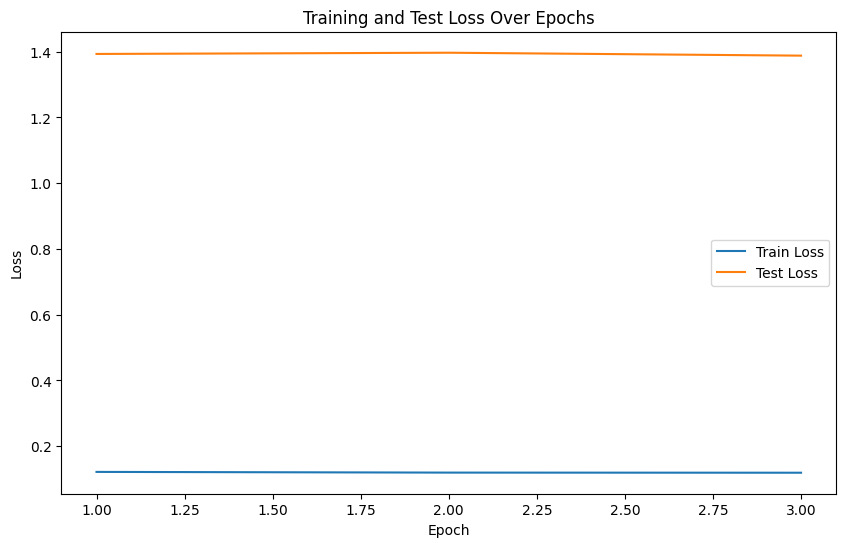

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

vocab_size = tokenizer.vocab_size  # Vocabulary size from BERT tokenizer
embed_size = 64   # Embedding size
hidden_size = 32  # RNN hidden state size
output_size = 4    # Number of classes (AG News has 4 categories)
num_layers = 2    # Multi-layer RNN
dropout = 0.5
num_epochs = 3
# Instantiate the model
model = MultiLayerGRU(vocab_size, embed_size, hidden_size, output_size, num_layers, dropout).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    print("Running epoch:", epoch)
    model.train()
    running_loss = 0.0
    batch_counter = 0  # Add a batch counter to assess speed
    for batch in train_loader:
        if batch_counter % 10 == 0:
            print("Running batch:", batch_counter)
        batch_counter = batch_counter + 1
        input_ids = batch['input_ids'].to(device)  # Shape: (batch_size, seq_len)
        labels = batch['labels'].to(device)        # Shape: (batch_size,)
        
        optimizer.zero_grad()
        outputs  = model(input_ids)  # Convert to float for matrix multiplication
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * input_ids.size(0)
        # Break out of training for brevity in the class, you can remove this
        if batch_counter == 20:
            break
    
    epoch_train_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)
    
    # Evaluate on test set
    model.eval()
    running_loss_test = 0.0
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            running_loss_test += loss.item() * input_ids.size(0)
    
    epoch_test_loss = running_loss_test / len(test_dataset)
    test_losses.append(epoch_test_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

# Plot the training and test losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

In [27]:

# The Easy way
class TorchGRUModel(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, output_size, num_layers, dropout):

        super(TorchGRUModel, self).__init__()
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        
        # GRU layer
        self.gru = nn.GRU(embedding_size, 
                         hidden_size, 
                         num_layers=num_layers, 
                         bidirectional=False, 
                         dropout=dropout if num_layers > 1 else 0,
                         batch_first=True)

        # Dropout layer
        self.dropout = nn.Dropout(dropout)
        
        # Linear layer
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        
        # Get embeddings
        x = self.embedding(x)        
        # GRU
        gru_output, hidden = self.gru(x)
        # Final hidden state
        hidden = self.dropout(hidden[-1,:,:])
        # Pass through linear layer
        output = self.fc(hidden)
        # output shape: [batch_size, output_dim]
        
        return output

Using device: cuda
Running epoch: 0
Running batch: 0
Running batch: 10
Epoch 1/3, Train Loss: 0.1202, Test Loss: 1.3881
Running epoch: 1
Running batch: 0
Running batch: 10
Epoch 2/3, Train Loss: 0.1189, Test Loss: 1.3867
Running epoch: 2
Running batch: 0
Running batch: 10
Epoch 3/3, Train Loss: 0.1188, Test Loss: 1.3866


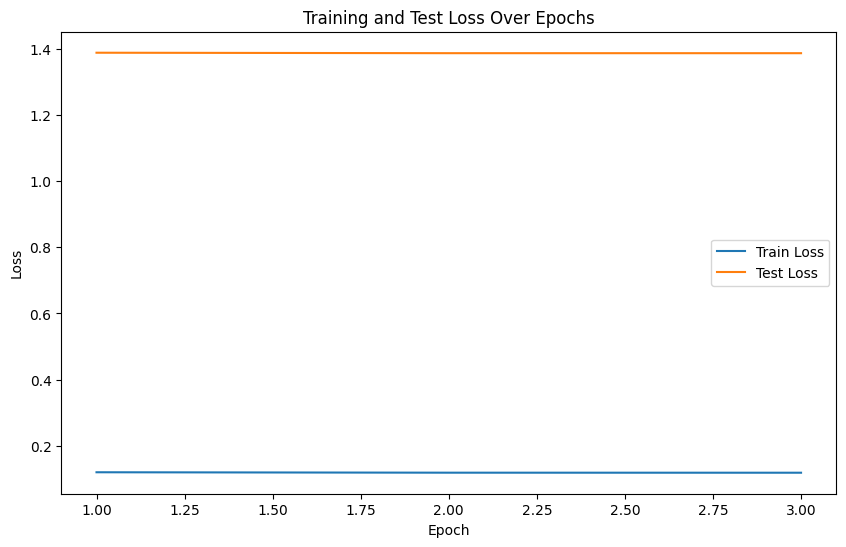

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

vocab_size = tokenizer.vocab_size  # Vocabulary size from BERT tokenizer
embed_size = 64   # Embedding size
hidden_size = 32  # RNN hidden state size
output_size = 4    # Number of classes (AG News has 4 categories)
num_layers = 2    # Multi-layer RNN
dropout = 0.5
num_epochs = 3
# Instantiate the model
model = TorchGRUModel(vocab_size, embed_size, hidden_size, output_size, num_layers, dropout).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    print("Running epoch:", epoch)
    model.train()
    running_loss = 0.0
    batch_counter = 0  # Add a batch counter to assess speed
    for batch in train_loader:
        if batch_counter % 10 == 0:
            print("Running batch:", batch_counter)
        batch_counter = batch_counter + 1
        input_ids = batch['input_ids'].to(device)  # Shape: (batch_size, seq_len)
        labels = batch['labels'].to(device)        # Shape: (batch_size,)
        
        optimizer.zero_grad()
        outputs  = model(input_ids)  # Convert to float for matrix multiplication
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * input_ids.size(0)
        # Break out of training for brevity in the class, you can remove this
        if batch_counter == 20:
            break
    
    epoch_train_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)
    
    # Evaluate on test set
    model.eval()
    running_loss_test = 0.0
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            running_loss_test += loss.item() * input_ids.size(0)
    
    epoch_test_loss = running_loss_test / len(test_dataset)
    test_losses.append(epoch_test_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

# Plot the training and test losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

In [42]:
class LSTMLayer(nn.Module):
    def __init__(self, input_size, hidden_size):
        """
        Args:
            input_size (int): Number of input features.
            hidden_size (int): Number of hidden units.
        """
        super(LSTMLayer, self).__init__()
        self.hidden_size = hidden_size

        # ----- Forget Gate -----
        self.W_xf = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_hf = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_f = nn.Parameter(torch.Tensor(hidden_size))

        # ----- Input Gate -----
        self.W_xi = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_hi = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_i = nn.Parameter(torch.Tensor(hidden_size))

        # ----- Candidate Cell State -----
        self.W_xc = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_hc = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_c = nn.Parameter(torch.Tensor(hidden_size))

        # ----- Output Gate -----
        self.W_xo = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.W_ho = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.b_o = nn.Parameter(torch.Tensor(hidden_size))

        self.reset_parameters()

    def reset_parameters(self):
        """Uses Xavier & Orthogonal initialization for stability."""
        nn.init.xavier_uniform_(self.W_xf)
        nn.init.xavier_uniform_(self.W_xi)
        nn.init.xavier_uniform_(self.W_xc)
        nn.init.xavier_uniform_(self.W_xo)

        nn.init.orthogonal_(self.W_hf)
        nn.init.orthogonal_(self.W_hi)
        nn.init.orthogonal_(self.W_hc)
        nn.init.orthogonal_(self.W_ho)

        nn.init.zeros_(self.b_f)
        nn.init.zeros_(self.b_i)
        nn.init.zeros_(self.b_c)
        nn.init.zeros_(self.b_o)

    def forward(self, x, hidden):
        """
        Forward pass of a single LSTM layer.

        Args:
            x (Tensor): Input tensor of shape (batch_size, seq_len, input_size).
            hidden (tuple): Tuple of hidden state (h) and cell state (c), both of shape (batch_size, hidden_size).

        Returns:
            output (Tensor): Output sequence for this layer (batch_size, seq_len, hidden_size).
            (h, c) (Tensor, Tensor): Updated hidden and cell states (batch_size, hidden_size).
        """
        h, c = hidden
        batch_size, seq_len, input_size = x.size()
        output_sequence = []

        for t in range(seq_len):
            x_t = x[:, t, :]

            # Compute forget gate
            f_t = torch.sigmoid(x_t @ self.W_xf + h @ self.W_hf + self.b_f)

            # Compute input gate
            i_t = torch.sigmoid(x_t @ self.W_xi + h @ self.W_hi + self.b_i)

            # Compute candidate cell state
            c_tilde = torch.tanh(x_t @ self.W_xc + h @ self.W_hc + self.b_c)

            # Update cell state
            c = f_t * c + i_t * c_tilde

            # Compute output gate
            o_t = torch.sigmoid(x_t @ self.W_xo + h @ self.W_ho + self.b_o)

            # Compute new hidden state
            h = o_t * torch.tanh(c)

            output_sequence.append(h.unsqueeze(1))  # Store output for each time step

        # Concatenate outputs along time dimension
        output = torch.cat(output_sequence, dim=1)
        return output, (h, c)

class MultiLayerLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, output_size, num_layers=1, dropout=0.0):
        """
        Implements a multi-layer LSTM for AG News classification.

        Args:
            vocab_size (int): Size of the vocabulary.
            embedding_size (int): Size of the word embeddings.
            hidden_size (int): Number of hidden units per layer.
            output_size (int): Number of output classes (4 for AG News).
            num_layers (int): Number of stacked LSTM layers.
            dropout (float): Dropout probability applied between layers.
        """
        super(MultiLayerLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = dropout

        # Stack multiple LSTM layers
        self.lstm_layers = nn.ModuleList()
        for layer in range(num_layers):
            layer_input_size = embedding_size if layer == 0 else hidden_size
            self.lstm_layers.append(LSTMLayer(layer_input_size, hidden_size))

        # Dropout layer applied between LSTM layers
        self.dropout_layer = nn.Dropout(dropout) if dropout > 0 else nn.Identity()

        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, output_size)

        # Initialize the output layer
        self.reset_parameters()

    def reset_parameters(self):
        """Applies Xavier uniform initialization to the final output layer."""
        nn.init.xavier_uniform_(self.fc.weight)
        if self.fc.bias is not None:
            nn.init.zeros_(self.fc.bias)
    
    def forward(self, x, h0=None, c0=None):
        """
        Forward pass of the multi-layer LSTM.
    
        Args:
            x (Tensor): Input tensor of shape (batch_size, seq_len).
            h0 (Tensor, optional): Initial hidden state.
            c0 (Tensor, optional): Initial cell state.
    
        Returns:
            output (Tensor): Final output from the last layer (batch_size, output_size).
            hidden_states (list of (Tensor, Tensor)): Hidden and cell states from all layers [(h, c)].
        """
        batch_size, seq_len = x.size()
        
        # Embedding layer
        x = self.embedding(x)  # (batch_size, seq_len, embedding_size)
    
        # Initialize hidden states if not provided
        if h0 is None:
            h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size, device=x.device)
        if c0 is None:
            c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size, device=x.device)
    
        hidden_states = []
        h, c = h0, c0
    
        # Process through each layer
        for layer in range(self.num_layers):
            # Process input through current LSTM layer
            layer_output, (h_n, c_n) = self.lstm_layers[layer](x, (h[layer], c[layer]))
            hidden_states.append((h_n, c_n))
            
            # Update hidden state for this layer
            h = torch.cat([h[:layer], h_n.unsqueeze(0), h[layer+1:]]) if layer < self.num_layers - 1 else h_n.unsqueeze(0)
            c = torch.cat([c[:layer], c_n.unsqueeze(0), c[layer+1:]]) if layer < self.num_layers - 1 else c_n.unsqueeze(0)
            
            # Set input for next layer (apply dropout except for last layer)
            x = layer_output
            if layer < self.num_layers - 1:
                x = self.dropout_layer(x)
    
        # Use the final hidden state from the last layer for classification
        final_hidden = h[-1]  # (batch_size, hidden_size)
        
        # Final classification layer
        logits = self.fc(final_hidden)  # (batch_size, output_size)
        
        return logits, hidden_states


Using device: cuda
Running epoch: 0
Running batch: 0
Running batch: 10
Epoch 1/3, Train Loss: 0.1186, Test Loss: 1.3864
Running epoch: 1
Running batch: 0
Running batch: 10
Epoch 2/3, Train Loss: 0.1184, Test Loss: 1.3868
Running epoch: 2
Running batch: 0
Running batch: 10
Epoch 3/3, Train Loss: 0.1184, Test Loss: 1.3865


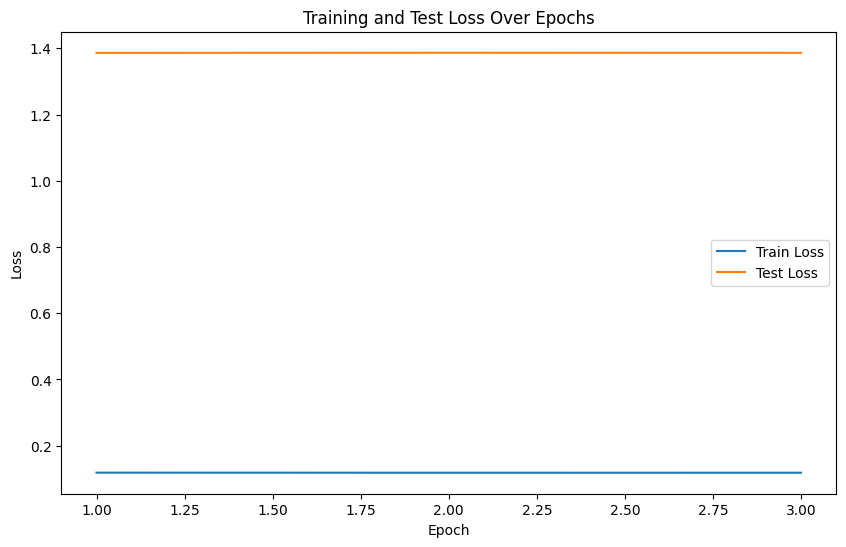

In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

vocab_size = tokenizer.vocab_size  # Vocabulary size from BERT tokenizer
embed_size = 64   # Embedding size
hidden_size = 32  # RNN hidden state size
output_size = 4    # Number of classes (AG News has 4 categories)
num_layers = 2    # Multi-layer RNN
dropout = 0.5
num_epochs = 3
# Instantiate the model
model = MultiLayerLSTM(
        vocab_size=vocab_size, 
        embedding_size=embed_size,
        hidden_size=hidden_size, 
        output_size=output_size, 
        num_layers=num_layers, 
        dropout=dropout
    ).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    print("Running epoch:", epoch)
    model.train()
    running_loss = 0.0
    batch_counter = 0  # Add a batch counter to assess speed
    for batch in train_loader:
        if batch_counter % 10 == 0:
            print("Running batch:", batch_counter)
        batch_counter = batch_counter + 1
        input_ids = batch['input_ids'].to(device)  # Shape: (batch_size, seq_len)
        labels = batch['labels'].to(device)        # Shape: (batch_size,)
        
        optimizer.zero_grad()
        outputs, _  = model(input_ids)  # Convert to float for matrix multiplication
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * input_ids.size(0)
        # Break out of training for brevity in the class, you can remove this
        if batch_counter == 20:
            break
    
    epoch_train_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)
    
    # Evaluate on test set
    model.eval()
    running_loss_test = 0.0
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            outputs, _ = model(input_ids)
            loss = criterion(outputs, labels)
            running_loss_test += loss.item() * input_ids.size(0)
    
    epoch_test_loss = running_loss_test / len(test_dataset)
    test_losses.append(epoch_test_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}")

# Plot the training and test losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

In [45]:
class TorchMultiLayerLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, output_size, num_layers=1, dropout=0.0):
        """
        Implements a multi-layer LSTM for AG News classification.

        Args:
            vocab_size (int): Size of the vocabulary.
            embedding_size (int): Size of the word embeddings.
            hidden_size (int): Number of hidden units per layer.
            output_size (int): Number of output classes (4 for AG News).
            num_layers (int): Number of stacked LSTM layers.
            dropout (float): Dropout probability applied between layers.
        """
        super(TorchMultiLayerLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = dropout

        # Use PyTorch's built-in LSTM
        self.lstm = nn.LSTM(
            input_size=embedding_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )

        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, output_size)

        # Initialize the output layer
        self.reset_parameters()

    def reset_parameters(self):
        """Applies Xavier uniform initialization to the final output layer."""
        nn.init.xavier_uniform_(self.fc.weight)
        if self.fc.bias is not None:
            nn.init.zeros_(self.fc.bias)

    def forward(self, x, h0=None, c0=None):
        """
        Forward pass of the multi-layer LSTM.

        Args:
            x (Tensor): Input tensor of shape (batch_size, seq_len).
            h0 (Tensor, optional): Initial hidden state.
            c0 (Tensor, optional): Initial cell state.

        Returns:
            output (Tensor): Final output from the last layer (batch_size, output_size).
            (h_n, c_n) (tuple): Final hidden and cell states.
        """
        # Get batch size and sequence length
        batch_size = x.size(0)
        
        # Embed the input
        embedded = self.embedding(x)  # (batch_size, seq_len, embedding_size)

        # Initialize hidden states if not provided
        if h0 is None:
            h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size, device=x.device)
        if c0 is None:
            c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size, device=x.device)

        # Run through LSTM
        output, (h_n, c_n) = self.lstm(embedded, (h0, c0))
        
        # Use the last hidden state for classification
        final_hidden = h_n[-1]  # (batch_size, hidden_size)
        
        # Final classification layer
        logits = self.fc(final_hidden)  # (batch_size, output_size)
        
        return logits, (h_n, c_n)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

vocab_size = tokenizer.vocab_size  # Vocabulary size from BERT tokenizer
embed_size = 256   # Embedding size
hidden_size = 256  # RNN hidden state size
output_size = 4    # Number of classes (AG News has 4 categories)
num_layers = 2    # Multi-layer LSTM
dropout = 0.3
num_epochs = 10
# Instantiate the model
model = TorchMultiLayerLSTM(
        vocab_size=vocab_size, 
        embed_size=embed_size,
        hidden_size=hidden_size, 
        output_size=output_size, 
        num_layers=num_layers, 
        dropout=dropout
    ).to(device)

# Trainable embeddings
model.embedding.weight.data.copy_(torch.randn(vocab_size, embed_size))  # Simple init
model.embedding.weight.requires_grad = True  # Ensure embeddings are trainable


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    print("Running epoch:", epoch)
    model.train()
    running_loss = 0.0
    batch_counter = 0  # Add a batch counter to assess speed
    for batch in train_loader:
        if batch_counter % 1000 == 0:
            print("Running batch:", batch_counter)
        batch_counter = batch_counter + 1
        input_ids = batch['input_ids'].to(device)  # Shape: (batch_size, seq_len)
        labels = batch['labels'].to(device)        # Shape: (batch_size,)
        
        optimizer.zero_grad()
        outputs  = model(input_ids)  # Convert to float for matrix multiplication
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Add this line
        optimizer.step()
        
        running_loss += loss.item() * input_ids.size(0)
        # Break out of training for brevity in the class, you can remove this
    
    epoch_train_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)
    
    # Evaluate on test set
    model.eval()
    running_loss_test = 0.0
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            running_loss_test += loss.item() * input_ids.size(0)
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
    epoch_test_loss = running_loss_test / len(test_dataset)
    test_losses.append(epoch_test_loss)
    epoch_accuracy = correct_predictions / total_predictions
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}, Test Accuracy: {epoch_accuracy:.4f}")

# Plot the training and test losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()